## Tujuan Proyek dan Penjelasan Dataset

Proyek ini bertujuan untuk membangun model regresi yang dapat memprediksi nilai akhir siswa berdasarkan data yang tersedia. Dataset yang digunakan berisi informasi mengenai nilai tugas, kuis, ujian tengah semester, dan ujian akhir semester dari masing-masing siswa.

**Fitur**:
- `Gender`: Jenis kelamin siswa
- `Age`: Usia
- `Education Level`: Jenjang pendidikan
- `Parental Status`: Status orang tua
- `Topic`: Topik pelajaran
- `Grade Point`: Nilai akhir siswa (target variabel)

Model akan dilatih untuk memprediksi nilai `Grade Point` berdasarkan fitur-fitur lainnya.

### Import Library
Pada tahap ini, kita mengimpor library yang diperlukan untuk manipulasi data, visualisasi, dan pemodelan.

In [4]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Load Dataset
Membaca dataset dari sumber eksternal (CSV) ke dalam DataFrame pandas.

In [3]:
# Upload File CSV
from google.colab import files
uploaded = files.upload()

df = pd.read_csv(next(iter(uploaded)))
df.head()


Saving StudentsPerformance.csv to StudentsPerformance.csv


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Exploratory Data Analysis (EDA)
Menampilkan informasi dasar dataset dan statistik deskriptif untuk memahami struktur dan distribusi data.

In [5]:
print("Info:")
df.info()

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
print("Describe:")
display(df.describe())

Describe:


,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Korelasi Antar Nilai Ujian
Grafik berikut menunjukkan matriks korelasi antara nilai matematika, membaca, dan menulis. Korelasi digunakan untuk mengukur kekuatan hubungan antar dua variabel numerik.

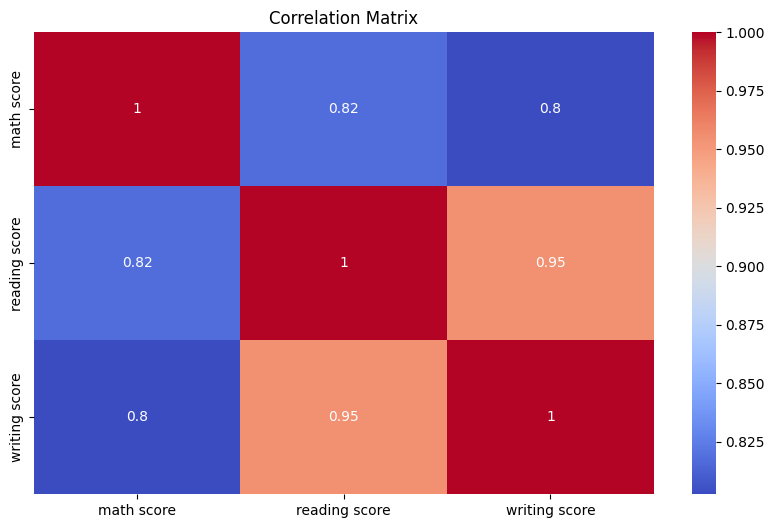

In [7]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

## Matriks Korelasi Nilai Ujian

Visualisasi berikut memperlihatkan hubungan antar nilai ujian **matematika**, **membaca**, dan **menulis**. Korelasi dihitung menggunakan Pearson Correlation Coefficient, yang nilainya berkisar dari -1 hingga 1.

- Korelasi antara **reading score** dan **writing score** adalah **0.95**, menunjukkan hubungan yang sangat kuat. Artinya, siswa yang memiliki kemampuan membaca yang baik hampir selalu memiliki kemampuan menulis yang baik.
- Korelasi antara **math score** dan **reading score** adalah **0.82**, dan dengan **writing score** adalah **0.80**, keduanya menunjukkan hubungan yang kuat namun tidak sekuat antar kemampuan literasi.

**Insight**:
Kemampuan membaca dan menulis siswa sangat berkaitan erat, yang bisa menjadi dasar penting dalam menyusun strategi pembelajaran. Sementara itu, matematika tetap berkorelasi kuat, menunjukkan bahwa siswa yang berprestasi cenderung memiliki performa merata di semua mata pelajaran.


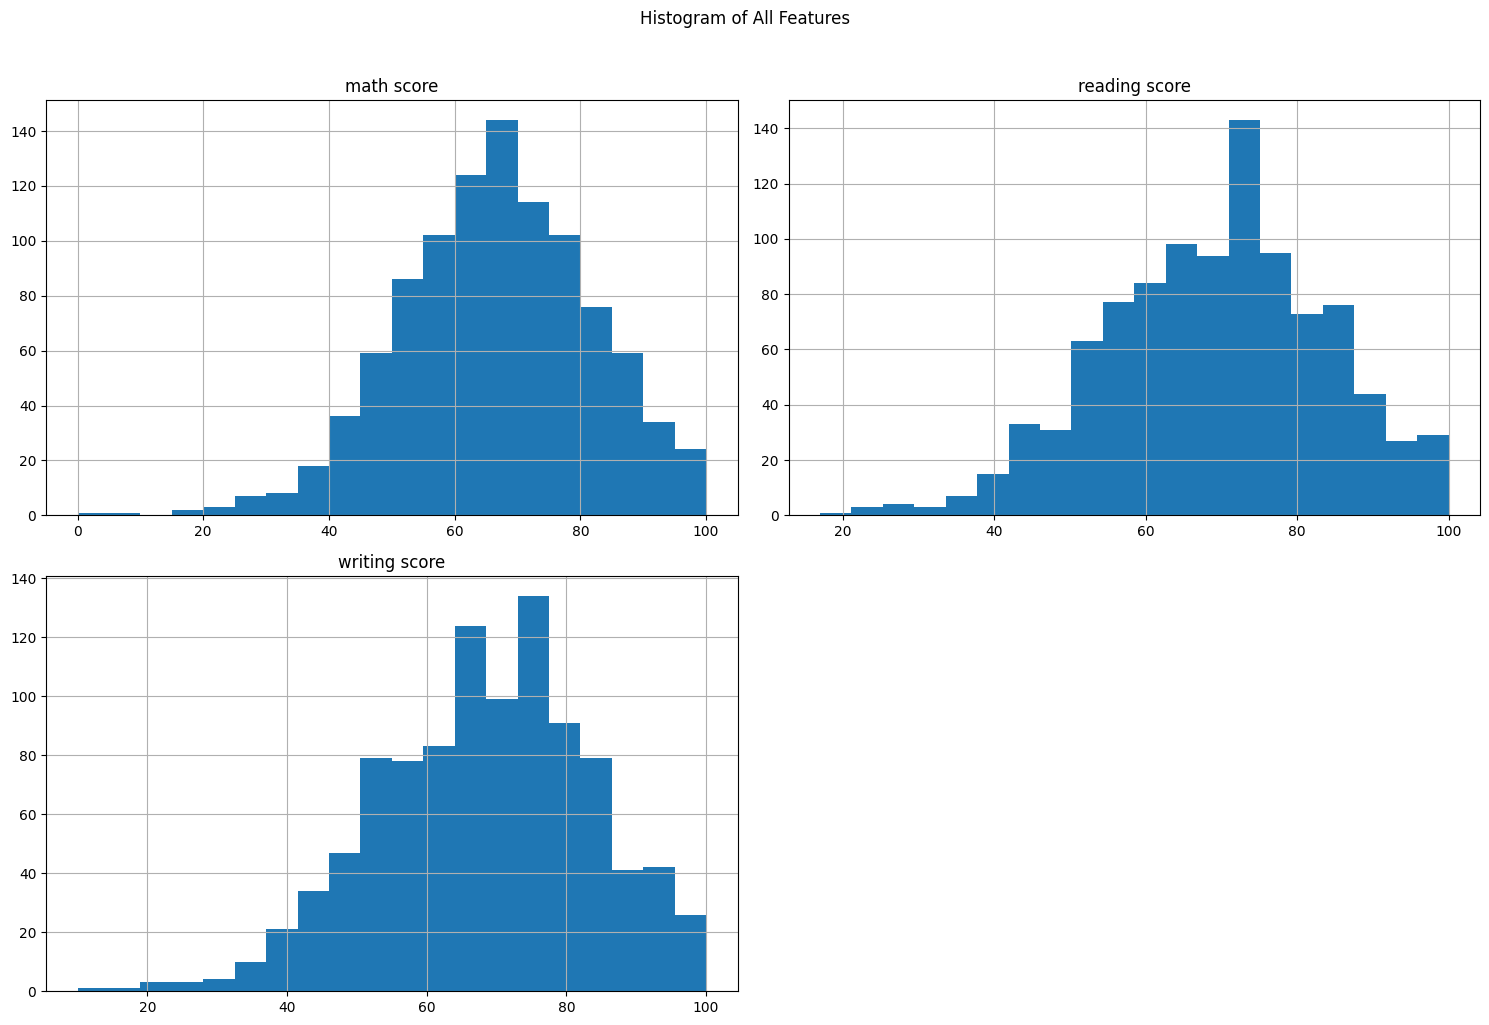

In [8]:
df.hist(figsize=(15,10), bins=20)
plt.suptitle("Histogram of All Features", y=1.02)
plt.tight_layout()
plt.show()

### Histogram of Student Scores: Math, Reading, and Writing

Visualisasi berikut menampilkan distribusi skor siswa pada tiga mata pelajaran: **math**, **reading**, dan **writing**.

#### 1. Math Score
- **Distribusi**: Cenderung normal, dengan puncak pada nilai **60–70**.
- **Sebaran**: Terdistribusi cukup simetris, meskipun ada sedikit skew ke kanan.
- **Insight**:
  - Mayoritas siswa memperoleh nilai matematika antara **60 dan 80**.
  - Hanya sedikit siswa yang mendapat nilai sangat rendah (di bawah 30) atau sangat tinggi (di atas 90).
  - Hal ini menunjukkan tingkat penguasaan matematika yang cukup rata-rata, dan mungkin tingkat kesulitan soal berada di kategori sedang.

#### 2. Reading Score
- **Distribusi**: Hampir normal dengan puncak tinggi di sekitar **70**.
- **Sebaran**: Skew ke kiri, menunjukkan lebih banyak siswa dengan nilai tinggi.
- **Insight**:
  - Banyak siswa mendapat nilai **di atas 70**, menunjukkan performa membaca yang cukup baik secara umum.
  - Skor minimum terlihat sekitar 20, namun distribusi meningkat tajam mulai dari nilai 50 ke atas.
  - Ini bisa menunjukkan bahwa keterampilan membaca menjadi kekuatan bagi sebagian besar siswa.

#### 3. Writing Score
- **Distribusi**: Hampir normal, tetapi terdapat **dua puncak utama** (bimodal) di sekitar **65** dan **75**.
- **Sebaran**: Simetris dengan dua klaster siswa.
- **Insight**:
  - Terdapat dua kelompok siswa dengan performa berbeda dalam menulis, yang mungkin disebabkan oleh faktor latar belakang seperti bantuan akademik atau kebiasaan belajar.
  - Secara umum, skor writing cenderung tinggi dan stabil di atas 60.

### Kesimpulan :
- Rata-rata skor siswa untuk semua mata pelajaran berkisar di antara **60–80**.
- **Reading dan Writing** memiliki distribusi yang lebih kuat dan tinggi dibandingkan dengan **Math**.
- Hal ini dapat menunjukkan bahwa siswa lebih unggul dalam aspek **bahasa** dibandingkan **matematika**.



# Pembersihan dan Pra Pemrosesan Data

### Cek Missing Values
Pada tahap ini, dilakukan pengecekan terhadap data yang hilang. Data yang hilang dapat memengaruhi performa model, sehingga perlu diketahui sejak awal.


In [9]:
print("=== Jumlah Missing Values per Kolom ===")
print(df.isnull().sum())

=== Jumlah Missing Values per Kolom ===
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


### Cek Duplikasi Data
Pada tahap ini, dilakukan pengecekan terhadap data yang duplikat. Data yang hilang dapat memengaruhi performa model, sehingga perlu diketahui sejak awal


In [10]:
print("=== Jumlah Duplikasi Data ===")
print(df.duplicated().sum())

=== Jumlah Duplikasi Data ===
0


## Kesimpulan Tahapan Ini
Data dalam kondisi baik dan bersih:

- Tidak ada nilai yang hilang

- Tidak ada duplikasi

# Memabangun model dan train

### Menambahkan `average_score` sebagai Target
Menghitung rata-rata dari tiga skor ujian untuk digunakan sebagai variabel target.

In [11]:
# menambahkan kolom average_score sebagai target
df['average_score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)
df[['math score', 'reading score', 'writing score', 'average_score']].head()

,math score,reading score,writing score,average_score
0,72,72,74,72.666667
1,69,90,88,82.333333
2,90,95,93,92.666667
3,47,57,44,49.333333
4,76,78,75,76.333333


### Data Preparation
Melakukan pembersihan dan encoding data:
1. One-hot encoding fitur kategorikal
2. Membagi data menjadi train & test

In [12]:
# encoding fitur kategorikal
df_encoded = pd.get_dummies(df.drop(['math score', 'reading score', 'writing score'], axis=1), drop_first=True)

In [13]:
# Split data
X = df_encoded.drop('average_score', axis=1)
y = df_encoded['average_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model Training
Melatih dua model regresi: Linear Regression dan Random Forest Regressor.

In [14]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

### Evaluation
Menghitung metrik evaluasi: MAE, RMSE, dan R² Score untuk kedua model.

In [15]:
def evaluate_model(name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{name} Performance:")
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R² Score: {r2:.2f}\n")

In [16]:
evaluate_model("Linear Regression", y_test, y_pred_lr)
evaluate_model("Random Forest", y_test, y_pred_rf)

Linear Regression Performance:
MAE: 10.49
RMSE: 13.40
R² Score: 0.16

Random Forest Performance:
MAE: 11.48
RMSE: 14.78
R² Score: -0.02



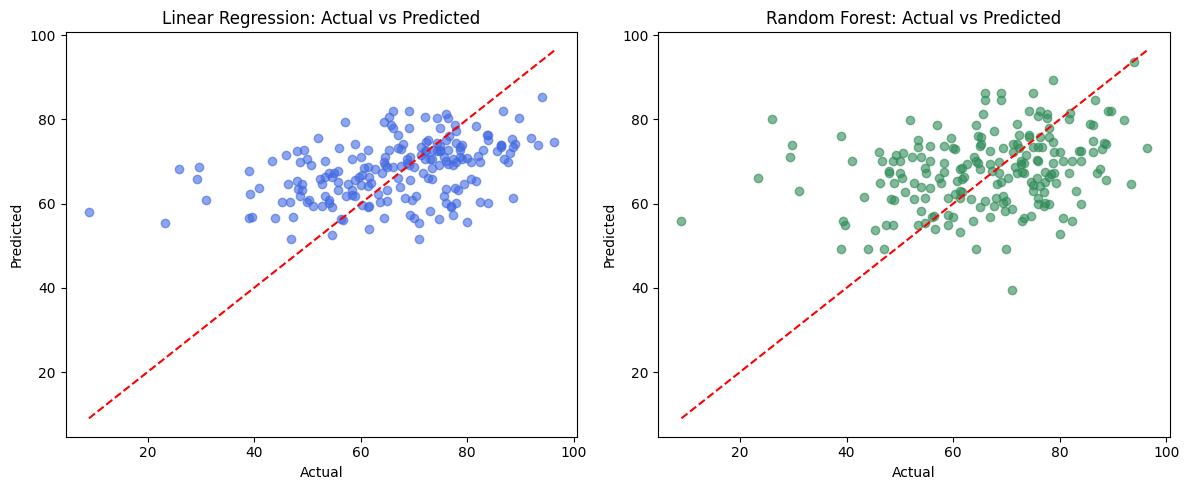

In [22]:
# Visualisasi: Actual vs Predicted untuk Linear Regression
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lr, alpha=0.6, color='royalblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Garis ideal
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression: Actual vs Predicted')

# Visualisasi: Actual vs Predicted untuk Random Forest
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_rf, alpha=0.6, color='seagreen')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest: Actual vs Predicted')

plt.tight_layout()
plt.show()

### Evaluasi Visual: Actual vs Predicted (Linear Regression vs Random Forest)

Grafik berikut membandingkan nilai aktual (`y_test`) dengan hasil prediksi (`y_pred`) dari dua model:

🔹 **Linear Regression**  
- Sebagian besar titik mendekati garis merah `y = x`, yang menandakan prediksi cukup akurat.
- Meskipun terdapat penyebaran, pola linier masih terlihat jelas.
- Ini sejalan dengan nilai R² positif (0.16) dan error yang lebih kecil dibanding Random Forest.

🔹 **Random Forest**  
- Prediksi tersebar cukup luas dan banyak titik menjauh dari garis ideal.
- Model tampak mengalami **underfitting**, karena tidak mampu menangkap variasi data yang kompleks.
- Hal ini juga didukung oleh nilai R² negatif, yang artinya model kurang baik dibanding prediksi rata-rata.

📌 **Kesimpulan Visual:**
Linear Regression memberikan hasil yang **lebih konsisten dan mendekati aktual**, menjadikannya model yang lebih baik untuk dataset ini dibandingkan Random Forest.


### Analisis Feature Importance Menggunakan Random Forest

Random Forest menyediakan atribut `.feature_importances_` untuk menilai seberapa besar kontribusi masing-masing fitur terhadap prediksi. Langkah ini penting untuk menjawab pertanyaan: **fitur mana yang paling berpengaruh terhadap nilai akhir siswa?**

Kode berikut akan menampilkan fitur-fitur yang paling berpengaruh, diurutkan dari yang tertinggi hingga terendah.


In [21]:
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf.feature_importances_
}).sort_values(by='importance', ascending=False)

### Visualisasi fitur mana yang paling berpengaru terhadap nilai akhir siswa

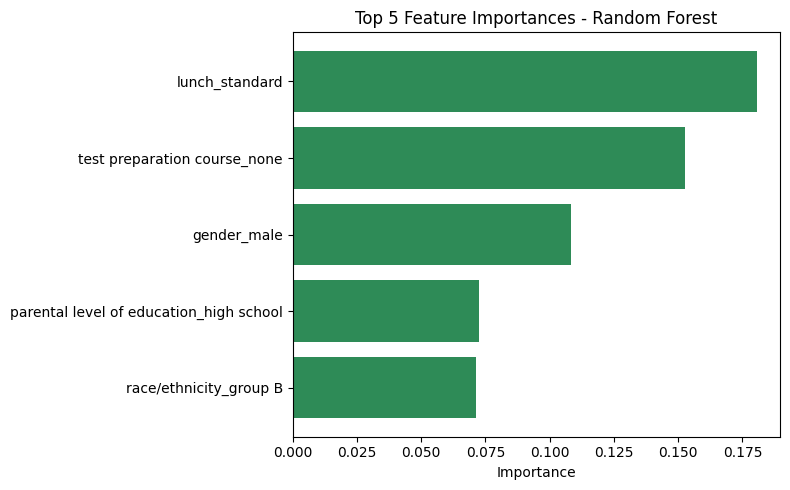

In [20]:
top_features = feature_importance.head(5)
plt.figure(figsize=(8, 5))
plt.barh(top_features['feature'], top_features['importance'], color='seagreen')
plt.xlabel('Importance')
plt.title('Top 5 Feature Importances - Random Forest')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


### Analisis Feature Importance - Random Forest

Grafik berikut menampilkan **5 fitur yang paling berpengaruh terhadap prediksi nilai akhir siswa**, berdasarkan model Random Forest:

1. **lunch_standard**  
   Siswa yang mendapatkan makan siang standar cenderung memiliki nilai lebih tinggi dibandingkan mereka yang mendapatkan makan siang gratis atau bersubsidi. Akses terhadap gizi yang lebih baik kemungkinan mendukung konsentrasi dan performa belajar.

2. **test preparation course_none**  
   Fitur ini menunjukkan siswa yang **tidak mengikuti kursus persiapan**. Importance tinggi pada fitur ini menandakan bahwa **tidak mengikuti kursus persiapan memiliki pengaruh besar terhadap penurunan nilai akhir**.

3. **gender_male**  
   Perbedaan nilai antara siswa laki-laki dan perempuan cukup signifikan, sehingga fitur ini muncul sebagai salah satu yang paling berpengaruh.

4. **parental level of education_high school**  
   Pendidikan orang tua, terutama jika hanya sampai SMA, menunjukkan dampak terhadap nilai siswa. Ini bisa dikaitkan dengan keterbatasan dukungan akademik di rumah.

5. **race/ethnicity_group B**  
   Kelompok etnis tertentu juga berpengaruh terhadap distribusi nilai, meskipun perlu diinterpretasi secara hati-hati untuk menghindari bias.

**Kesimpulan:**  
Fitur yang berkaitan dengan **intervensi sekolah** (seperti program makan siang dan kursus persiapan) muncul konsisten sebagai yang paling berpengaruh. Ini menunjukkan bahwa sekolah memiliki ruang besar untuk meningkatkan performa akademik siswa melalui dukungan non-akademik.


### Kesimpulan
Berdasarkan R² Score, pilih model terbaik dan berikan rekomendasi.

In [18]:
best = 'Linear Regression' if r2_score(y_test, y_pred_lr) > r2_score(y_test, y_pred_rf) else 'Random Forest'
print(f"Model terbaik: {best}")

Model terbaik: Linear Regression


# Interpretasi

### Interpretasi

#### 1. Model Terbaik: Linear Regression
Berdasarkan hasil evaluasi dengan metrik MAE, RMSE, dan R² Score, model Linear Regression menunjukkan performa terbaik dalam memprediksi nilai akhir siswa:
- MAE: 10.49
- RMSE: 13.40
- R² Score: 0.16

Sementara itu, model Random Forest justru menunjukkan underfitting dengan R² negatif (-0.02), menandakan bahwa model tersebut tidak lebih baik daripada tebakan rata-rata.

#### 2. Visualisasi Actual vs Predicted
Visualisasi menunjukkan bahwa:
- **Linear Regression** memiliki prediksi yang lebih konsisten, banyak titik yang mendekati garis `y = x`.
- **Random Forest** memiliki sebaran yang lebih menyebar dan acak, mengindikasikan ketidakmampuan model dalam menangkap pola dari data.

#### 3. Feature Importance (Random Forest)
Analisis dari `.feature_importances_` menunjukkan bahwa fitur-fitur berikut paling berpengaruh terhadap nilai akhir siswa:
- `lunch_standard`: akses terhadap makanan standar sangat berpengaruh terhadap performa akademik siswa.
- `test preparation course_none`: siswa yang tidak mengikuti kursus persiapan cenderung memiliki nilai lebih rendah.
- `gender_male`: terdapat perbedaan skor antara laki-laki dan perempuan.
- `parental level of education_high school`: latar belakang pendidikan orang tua berpengaruh terhadap hasil belajar siswa.
- `race/ethnicity_group B`: perbedaan latar belakang etnis juga menunjukkan kontribusi terhadap nilai akhir.

#### 4. Kesimpulan
- Linear Regression adalah model terbaik untuk dataset ini.
- Fitur sosial dan demografis (seperti jenis makan siang, kursus, gender, dan pendidikan orang tua) berperan penting dalam memengaruhi hasil belajar.
- Namun, R² yang relatif rendah menunjukkan bahwa faktor-faktor lain di luar data yang tersedia mungkin sangat penting (contohnya: motivasi, jam belajar, kehadiran, dll).

#### 5. Rekomendasi
- Menambahkan lebih banyak fitur relevan untuk meningkatkan akurasi prediksi.
- Lakukan tuning terhadap Random Forest agar performanya meningkat.
- Pertimbangkan mencoba model lain.